In [1]:
import pandas as pd
import glob
import os

In [2]:
files = glob.glob(os.path.join("./individual_book_train", "*.csv"))
time_ids = pd.read_csv(files[0]).time_id.unique()
len(time_ids)

3830

In [3]:
stocks = pd.read_csv("all_times.csv")
stocks

,stock_id,beta,dom,spread,time_id
0,0,1.208072,313.922175,0.000865,5
1,0,0.585157,327.583639,0.001232,4618
2,0,-0.018221,363.638971,0.001633,1536
3,0,0.814530,451.277377,0.001120,1761
4,0,1.212166,300.482836,0.001271,3596
...,...,...,...,...,...
101579,126,-4.365374,416.042082,0.000482,3135
101580,126,1.115225,370.809300,0.001978,2410
101581,126,1.937695,478.777840,0.001324,5601
101582,126,3.188407,447.969762,0.000688,5987


In [4]:
len(stocks.time_id.unique())

907

In [5]:
len(stocks.time_id.unique()) / len(time_ids)

0.23681462140992168

In [6]:
 len(time_ids) - len(stocks.time_id.unique())

2923

In [7]:
len(time_ids)//10

383

In [8]:
stocks['dom'].sum()

346651410.77368546

array([[<AxesSubplot:title={'center':'stock_id'}>,
        <AxesSubplot:title={'center':'mean_beta'}>,
        <AxesSubplot:title={'center':'mad_beta'}>],
       [<AxesSubplot:title={'center':'mean_dom'}>,
        <AxesSubplot:title={'center':'mad_dom'}>,
        <AxesSubplot:title={'center':'mean_spread'}>],
       [<AxesSubplot:title={'center':'mad_spread'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

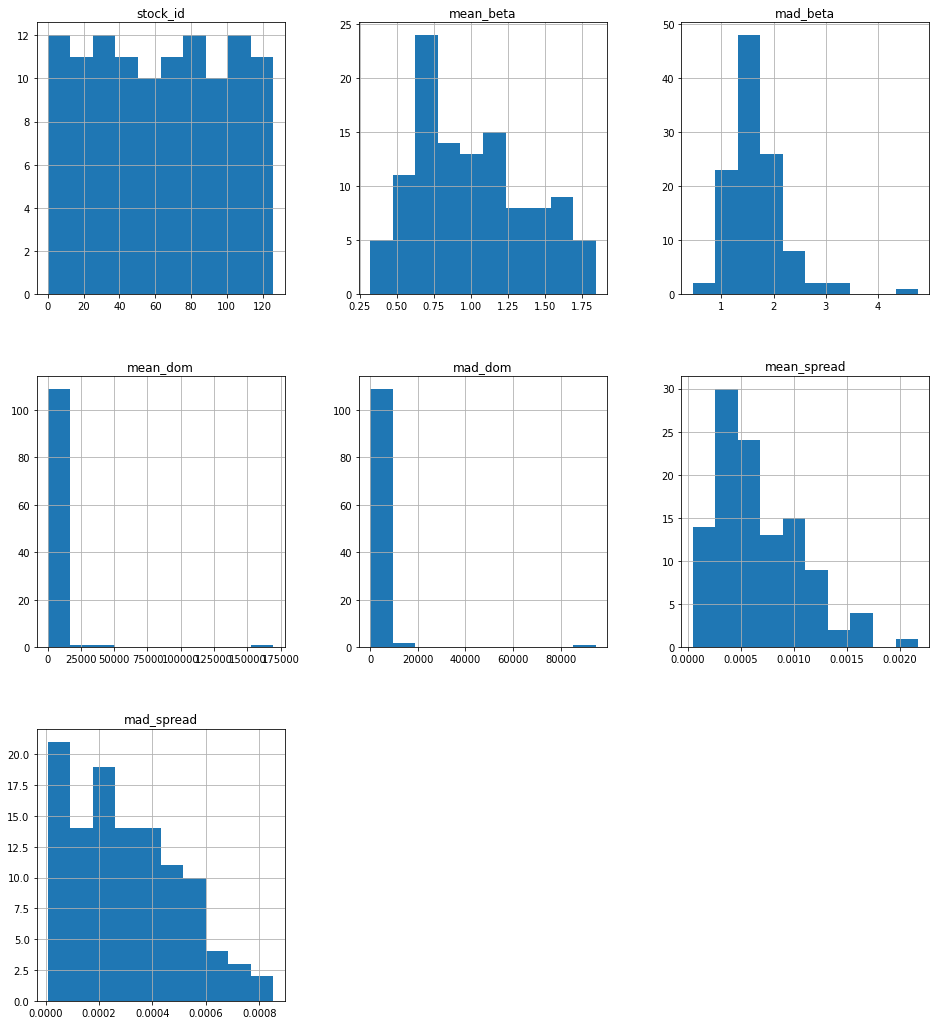

In [9]:
# storing averaged beta, dom & spread in dataframe for each
stock_final = pd.DataFrame({
    'stock_id': stocks['stock_id'].unique(),
    'mean_beta': stocks.groupby(['stock_id'])['beta'].mean(),
    #'sd_beta': stocks.groupby(['stock_id'])['beta'].std(),
    #'var_beta': stocks.groupby(['stock_id'])['beta'].var(),
    'mad_beta': stocks.groupby(['stock_id'])['beta'].mad(),

    'mean_dom': stocks.groupby(['stock_id'])['dom'].mean(),
    #'sd_dom': stocks.groupby(['stock_id'])['dom'].std(),
    #'var_dom': stocks.groupby(['stock_id'])['dom'].var(),
    'mad_dom': stocks.groupby(['stock_id'])['dom'].mad(),

    'mean_spread': stocks.groupby(['stock_id'])['spread'].mean(),
    #'sd_spread': stocks.groupby(['stock_id'])['spread'].std(),
    #'var_spread': stocks.groupby(['stock_id'])['spread'].var(),
    'mad_spread': stocks.groupby(['stock_id'])['spread'].mad()
})

s = stock_final.reset_index(drop=True)
s.hist(figsize = (16,18))

array([[<AxesSubplot:title={'center':'stock_id'}>,
        <AxesSubplot:title={'center':'mean_beta'}>,
        <AxesSubplot:title={'center':'mad_beta'}>],
       [<AxesSubplot:title={'center':'mean_dom'}>,
        <AxesSubplot:title={'center':'mad_dom'}>,
        <AxesSubplot:title={'center':'mean_spread'}>],
       [<AxesSubplot:title={'center':'mad_spread'}>,
        <AxesSubplot:title={'center':'mean_ldom'}>,
        <AxesSubplot:title={'center':'mad_ldom'}>]], dtype=object)

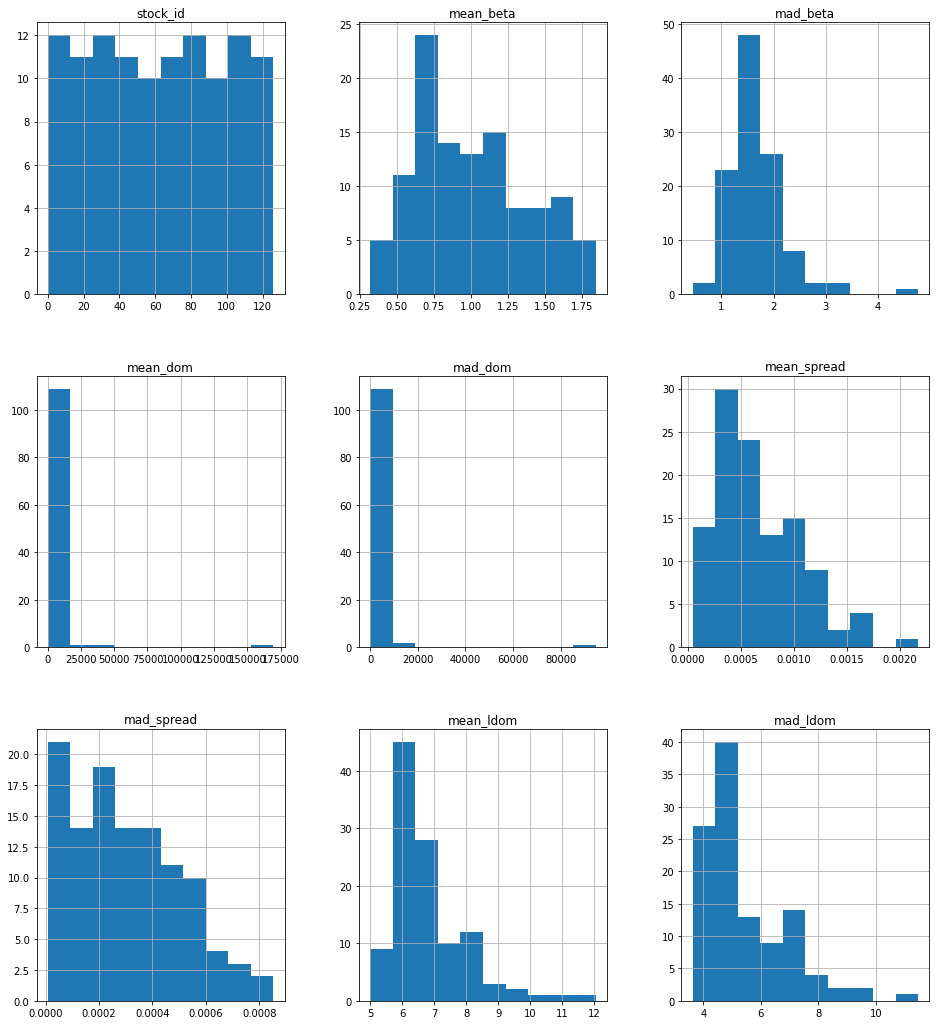

In [10]:
import numpy as np

s['mean_ldom'] = np.log(s['mean_dom'])
#s['sd_ldom'] = np.log(s['sd_dom'])
#s['var_ldom'] = np.log(s['var_dom'])
s['mad_ldom'] = np.log(s['mad_dom'])

s.hist(figsize = (16,18))

In [11]:
df = pd.concat([s.iloc[:,1:2], s.iloc[:,5:6], s.iloc[:,8:]], axis=1)
df

,mean_beta,mean_spread,mad_ldom
0,0.984306,0.001033,4.330574
1,1.499807,0.000720,4.857961
2,0.320088,0.000262,5.387745
3,1.780898,0.001076,4.958917
4,0.627131,0.000913,4.284911
...,...,...,...
107,1.430939,0.000645,4.610337
108,0.817943,0.000231,6.446290
109,1.675746,0.000206,7.586282
110,0.524086,0.000231,7.110565


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_beta,112.0,1.000000,0.377521,0.320088,0.704466,0.951014,1.286982,1.841217
mean_spread,112.0,0.000662,0.000399,0.000046,0.000355,0.000584,0.000935,0.002171
mad_ldom,112.0,5.490858,1.439205,3.630884,4.419653,4.981218,6.224532,11.458258


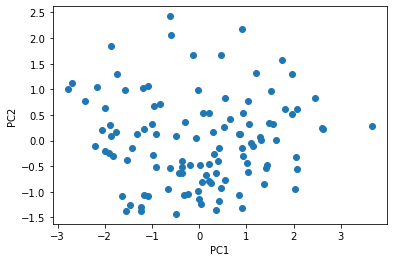

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_norm = scaler.fit_transform(df)


# PCA with 2 components for graphing
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_norm)

# Plot the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

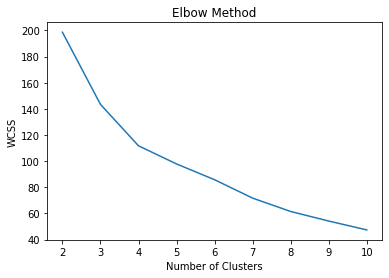

In [14]:
from sklearn.cluster import KMeans

# K-means clustering with unknown number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Estimated number of clusters: 4


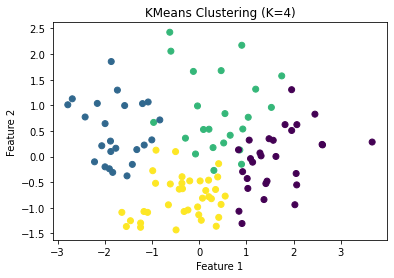

In [15]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(X_norm)
kmeans.labels_

num_clusters = len(set(kmeans.labels_))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f'KMeans Clustering (K={num_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

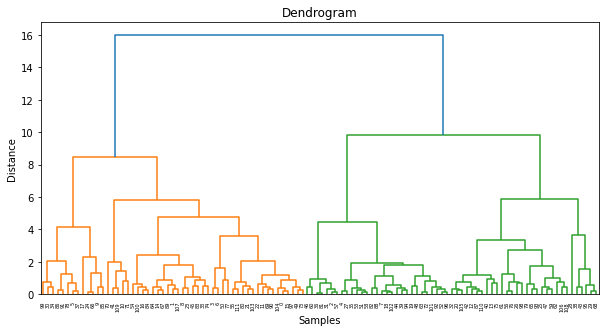

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierarchical clustering
Z = linkage(X_norm, method='ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Estimated number of clusters: 4


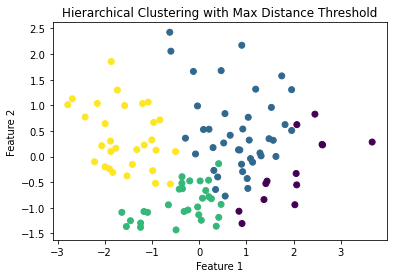

In [17]:
# Estimate number of clusters
max_d = 8 # Maximum distance threshold
clusters = fcluster(Z, max_d, criterion='distance')
num_clusters = len(set(clusters))

# Print number of clusters
print(f"Estimated number of clusters: {num_clusters}")

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering with Max Distance Threshold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

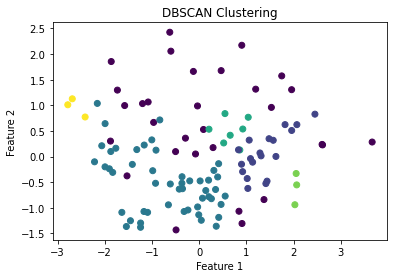

In [18]:
from sklearn.cluster import DBSCAN

# Density-based clustering with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
labels = dbscan.fit_predict(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

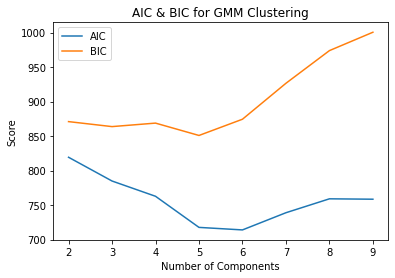

In [19]:
from sklearn.mixture import GaussianMixture

# GMM clustering with AIC and BIC
n_components = np.arange(2, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_norm) for n in n_components]
plt.plot(n_components, [m.aic(X_norm) for m in models], label='AIC')
plt.plot(n_components, [m.bic(X_norm) for m in models], label='BIC')

plt.title('AIC & BIC for GMM Clustering')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc = 'best')

plt.show()

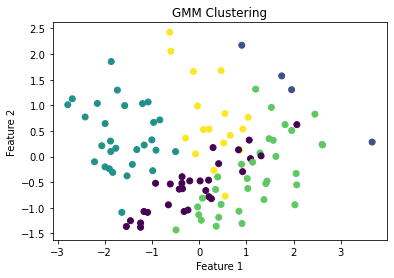

In [20]:
# GMM clustering with optimal number of clusters
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
labels = gmm.fit_predict(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()